Start by loading the new raw data in HW3_data.csv.
The dataset is almost identical to the one from the previous assignments, but we deleted
the binary targets and revealed the continuous contamination_level target variable.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
filename = 'data_HW3.csv'

In [32]:
dataset = pd.read_csv(filename)

In [33]:
from sklearn.model_selection import train_test_split
sum_of_last_2_digits_IDS=98
train_set , test_set = train_test_split(dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

In [34]:
import prepare
train_set_prepared = prepare.prepare_data(train_set,train_set)
test_set_prepared = prepare.prepare_data(train_set,train_set)

c:\Users\t-darnissan\OneDrive - Microsoft\Technion\Semster 6\236756 - Intro to ML\HW\ML_Intro\Major_HW3\prepare.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data[feature].fillna(median, inplace = True)
c:\Users\t-darnissan\OneDrive - Microsoft\Technion\Semster 6\236756 - Intro to ML\HW\ML_Intro\Major_HW3\prepare.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will

For this section only, split your training set into a (new) training subset (80%)
and a validation subset (20%).
● Copy the given LinearRegressor module into your notebook / project.

In [35]:
SectionA_Dataset = train_set_prepared.copy()
sectionA_train,sectionA_validation = train_test_split(SectionA_Dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

In [36]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
    def __init__(self, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param lr: the SGD learning rate (step size)
        """
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.zeros(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, X, y):
        """
        Compute the MSE objective loss.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the linear regression objective loss (float scalar)
        """

        # TODO: complete the loss calculation
        # Calculate the predicted values
        y_pred = np.dot(X, w) + b

        # Calculate the mean squared error loss
        loss = np.mean((y_pred - y) ** 2)

        return loss

    @staticmethod
    def gradient(w, b: float, X, y):
        # Calculate the predicted values
        y_pred = np.dot(X, w) + b
        # Calculate the error
        error = y_pred - y
        # Calculate the gradient with respect to w
        g_w = (2 / X.shape[0]) * np.dot(X.T, error)
        # Calculate the gradient with respect to b
        g_b = (2 / X.shape[0]) * np.sum(error)
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                      X_val  =None, y_val = None):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses: should compute the train & val losses during training?
        :param X_val: validation samples to compute the loss for (for logs only)
        :param y_val: validation labels to compute the loss for (for logs only)
        :return: training and validation losses during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        train_losses = []
        val_losses = []

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b, X, y))
            val_losses.append(self.loss(self.w, self.b, X_val, y_val))

        # Iterate over batches (SGD)
        for itr in range(0, max_iter):
            start_idx = (itr * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            # Compute the gradient for the current *batch*
            g_w, g_b = self.gradient(self.w, self.b, batch_X, batch_y)

            # Update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                train_losses.append(self.loss(self.w, self.b,  X, y))
                val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

        return train_losses, val_losses

    def fit(self, X, y, max_iter: int = 1000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Regress labels on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
        """

        y_pred = np.dot(X, self.w) + self.b
      

        return y_pred

In [37]:
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()


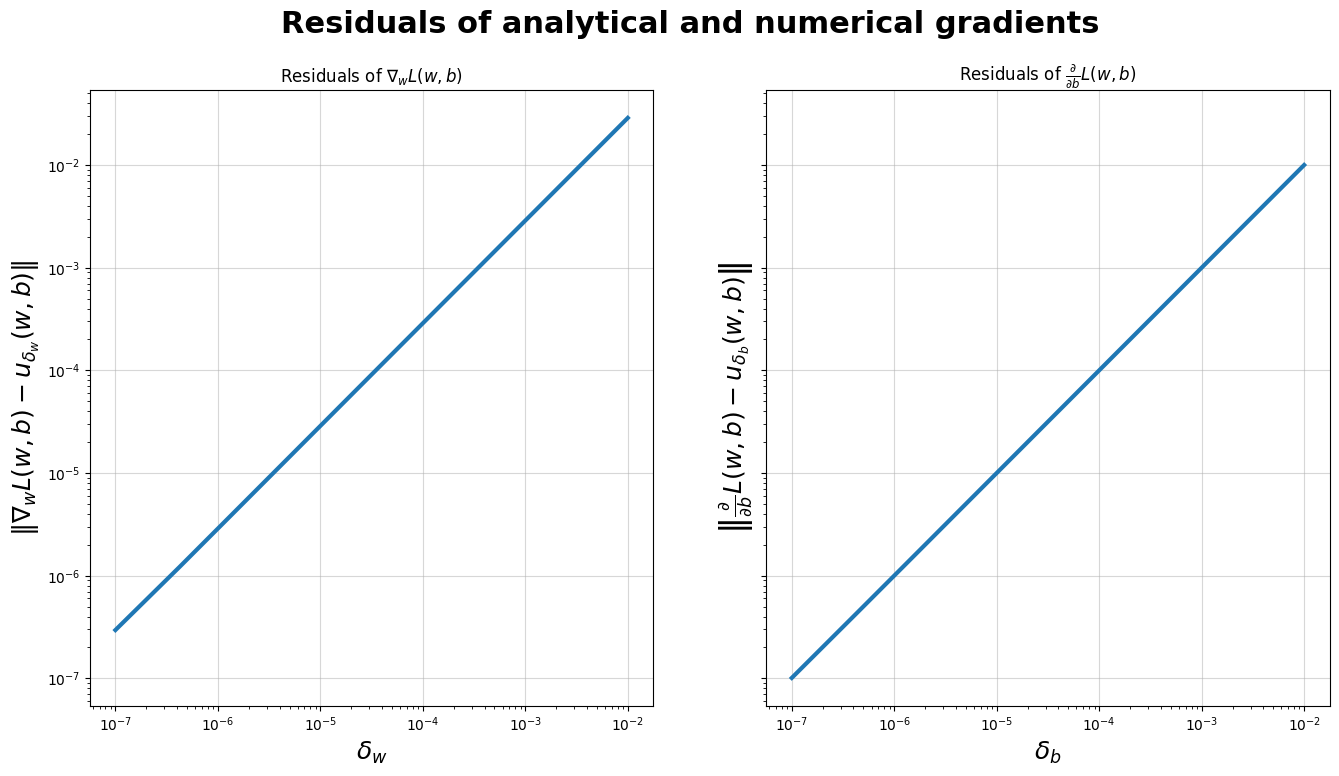

In [53]:
# take here the features PCR_10 to PCR_10 and sugar_levels
q2_X_train = sectionA_train[['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10','sugar_levels']].values
q2_y_train = sectionA_train['contamination_level'].values
compare_gradients(q2_X_train, q2_y_train, deltas=np.logspace(-7, -2, 9))

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-9, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)
  
  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 0.07553785944734966, Best validation loss = 0.08234882209750452
lr size = 1e-08, Best train loss = 0.07553503503598541, Best validation loss = 0.08234578096459699
lr size = 1e-07, Best train loss = 0.07550679936620269, Best validation loss = 0.08231537863595366
lr size = 1e-06, Best train loss = 0.07522528533817904, Best validation loss = 0.08201225359185062
lr size = 1e-05, Best train loss = 0.07249272204298676, Best validation loss = 0.0790690535660516
lr size = 0.0001, Best train loss = 0.05196690360637887, Best validation loss = 0.05690848262053074
lr size = 0.001, Best train loss = 0.022986844048755853, Best validation loss = 0.026014879081227918
lr size = 0.01, Best train loss = 0.02273743099482558, Best validation loss = 0.02580893267844454
lr size = 0.1, Best train loss = 0.02287432974768959, Best validation loss = 0.025154764386390555


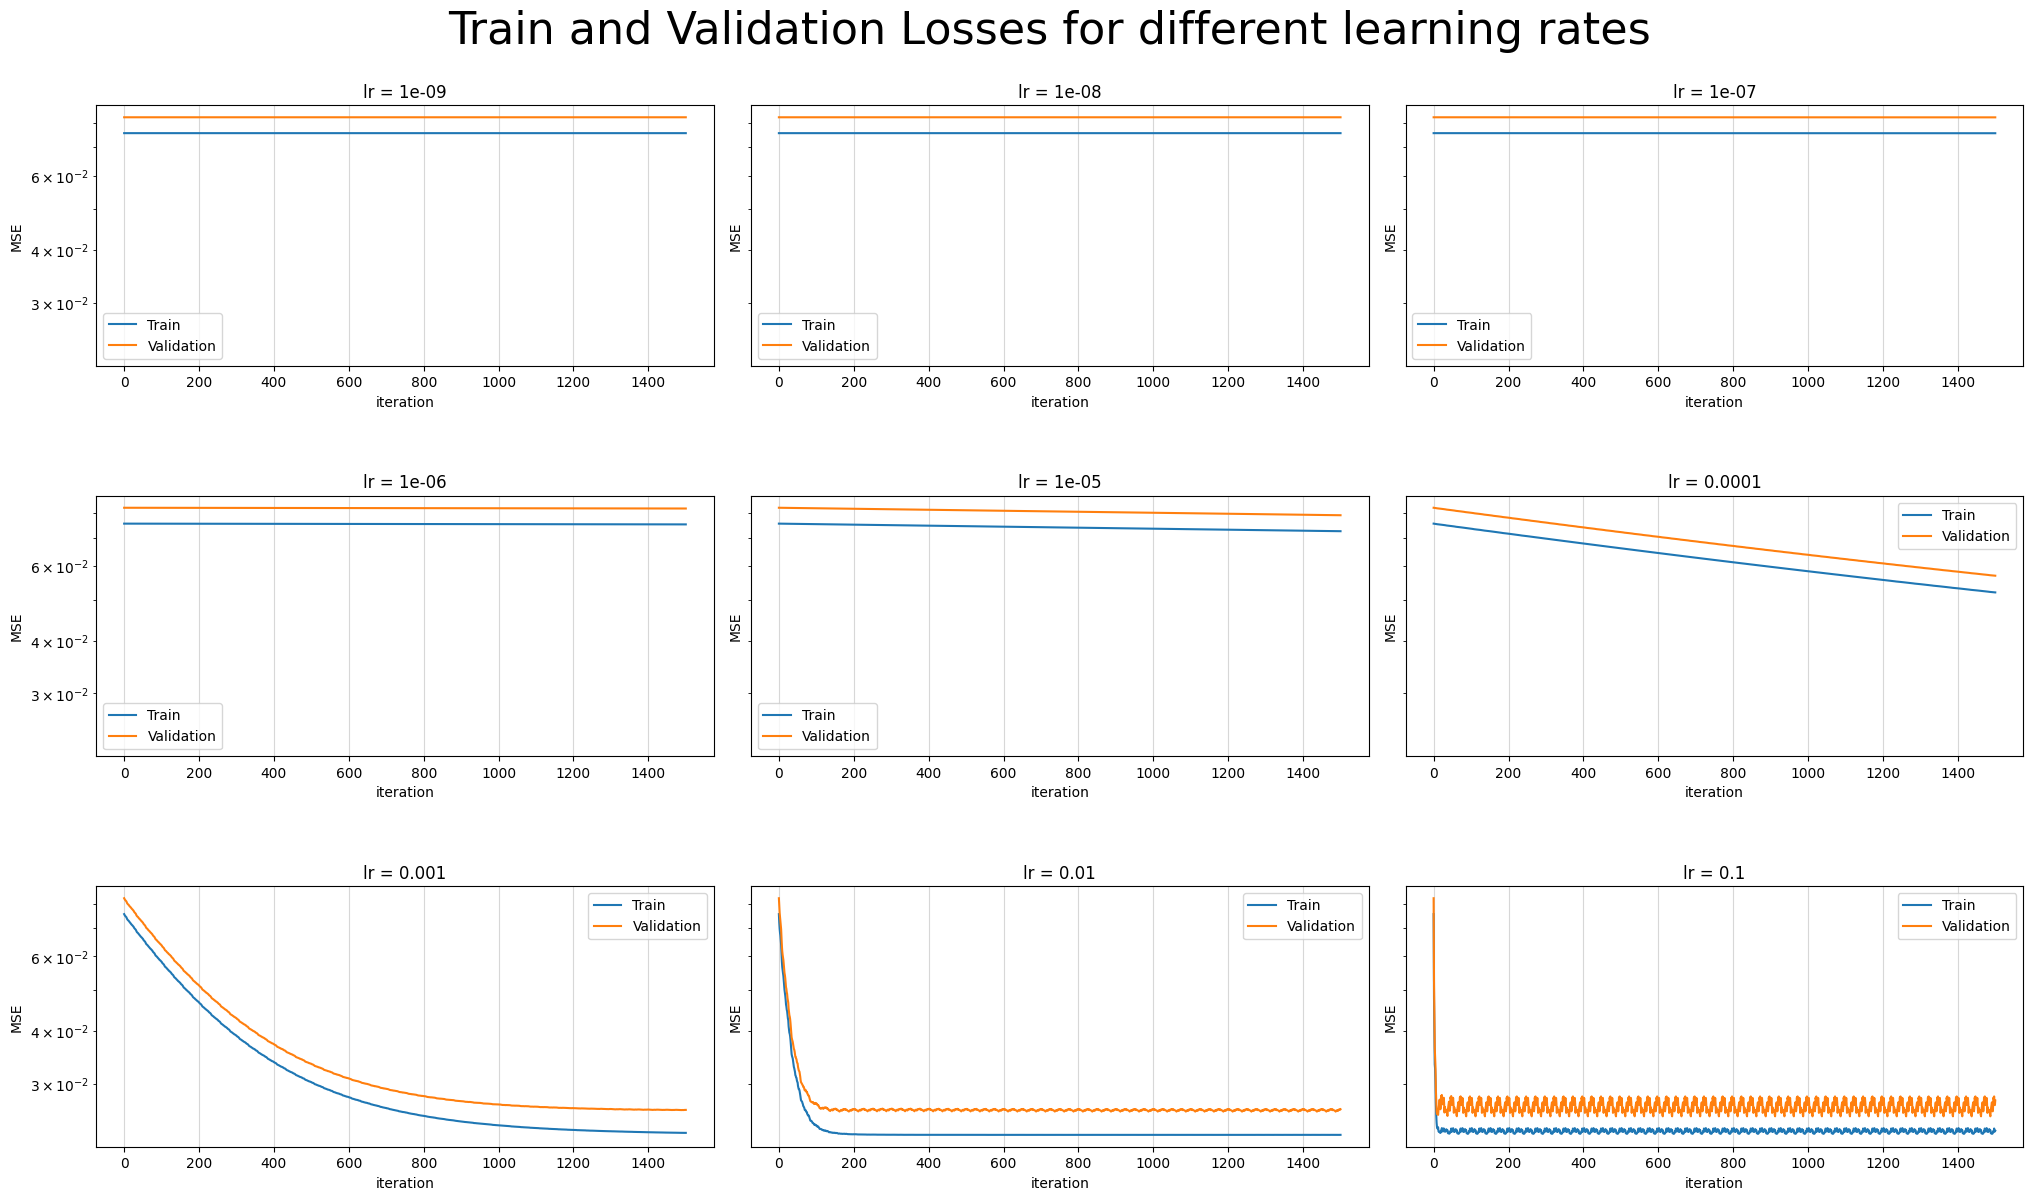

In [40]:
q3_X_val = sectionA_validation[['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']].values
q3_y_val = sectionA_validation['contamination_level'].values
test_lr(q2_X_train, q2_y_train, q3_X_val, q3_y_val,title='Train and Validation Losses for different learning rates')

SECTION 2

Section 2: Evaluation and Baseline
Our general goal is to minimize the generalization MSE, that is D(:,<)~?[(ℎ(G) − .)#].
As we have learned, in practice, we instead minimize the empirical error &
$ ∑ (ℎ(G") − .") $ #
"%&
on a training set, and tune hyperparameters using a validation set.
In the rest of this assignment, we use the k-fold cross-validation method for better estimating
the generalization error, thus improving the tuning procedure. We will use J = 5 folds.
Similar to HW2, we use sklearn to perform cross-validation on the (whole) training set to
evaluate the performance of models. As explained earlier, the metric we use for regression
is the MSE (using cross_validate, set scoring='neg_mean_squared_error').
Simplest baseline
We now train a simple DummyRegressor that always predicts the average
contamination_level of the training set. We will use this regressor throughout the
assignment as a baseline to which we will compare the performance of our learned
regressors.
(Q4) Create a DummyRegressor. Evaluate its performance using cross-validation.
In your report, fill in the cross-validated errors of the regressor.
Model Section Train MSE Valid MSE
Cross validated
Dummy 2
Task: Retrain the dummy regressor on the entire training set (= all its samples) and save it for
future use (Sec 6)

In [54]:
#setting the data for section 2 
SectionB_Dataset = train_set_prepared.copy()
Q4_y_train=SectionB_Dataset['contamination_level']


In [55]:
#take only pcr features
Q4_X_train = SectionB_Dataset[['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10','sugar_levels']].values

In [46]:
Q4_y_train

835    -0.167650
214    -0.081573
549     0.021867
1093    0.373358
687     0.055830
          ...   
708    -0.220754
65      0.225742
603    -0.052357
1204    0.481674
554     0.136643
Name: contamination_level, Length: 1000, dtype: float64

In [56]:
#train a dummy regressor always predicting the mean of the target variable
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy='mean')


In [62]:
from sklearn.model_selection import cross_validate
dummy_cv_results = cross_validate(dummy_regressor, Q4_X_train, Q4_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [63]:
print ('Mean train score: ', -dummy_cv_results['train_score'].mean())
print ('Mean validation score: ', -dummy_cv_results['test_score'].mean())

Mean train score:  0.06796938517450703
Mean validation score:  0.06832612661656343


Q5

lets Tune Learning Rate

1. Determining the tested values of the tuned hyperparameter (see numpy.logspace).
You need to choose suitable values by yourself that will help you optimize the
validation error
2. For each value, evaluating a suitable regressor using cross validation (J = 5).
3. Plotting (cross-validated) train and validation errors as a function of the hyperparameter.
Consider using semilogx or loglog plots.
Also plot a constant line with the validation error of the dummy regressor.
4. Reporting the value that yields the optimal validation error and its respective error.

In [60]:
-cv_results['train_score'].mean()

0.0074614068380123464

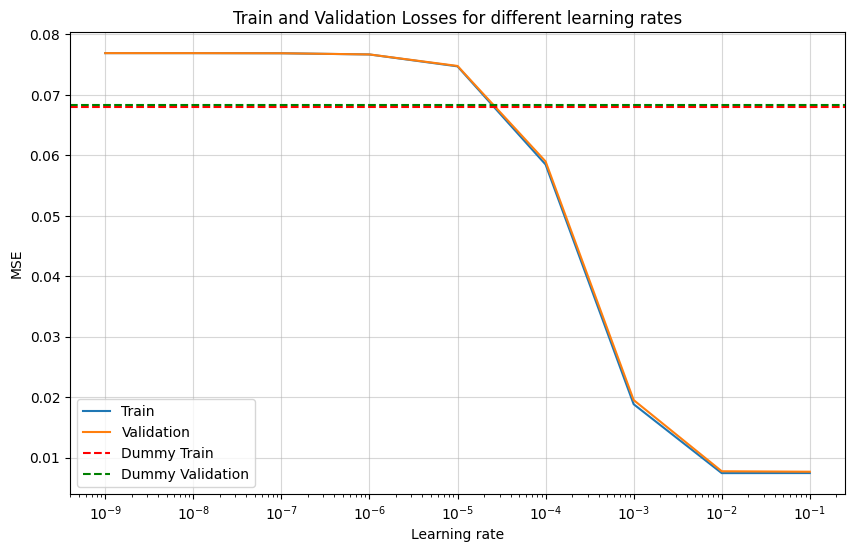

In [64]:
# step 1 - determine the tested values for learning rate
lr_list = np.logspace(-9, -1, 9)
# step 2 - for each value of learning rate, perform cross validation
train_scores = []
validation_scores = []
for lr in lr_list:
    cur_linear_reggressor = LinearRegressor(lr)
    cv_results = cross_validate(cur_linear_reggressor, Q4_X_train, Q4_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    train_scores.append(-cv_results['train_score'].mean())
    validation_scores.append(-cv_results['test_score'].mean())

# step 3 - plot the results , dont forget to add constand line for the dummy regressor
plt.figure(figsize=(10, 6))
plt.plot(lr_list, train_scores, label='Train')
plt.plot(lr_list, validation_scores, label='Validation')
plt.axhline(-dummy_cv_results['train_score'].mean(), color='r', linestyle='--', label='Dummy Train')
plt.axhline(-dummy_cv_results['test_score'].mean(), color='g', linestyle='--', label='Dummy Validation')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.title('Train and Validation Losses for different learning rates')
plt.legend()
plt.grid(alpha=0.5)
plt.show()



In [88]:
chosen_lr = 1e-2


Create an instance of your custom LinearRegressor and evaluate its performance
using cross-validation, remember to tune the LR!

In [91]:
# create a linear regressor with the chosen learning rate
final_linear_regressor = LinearRegressor(chosen_lr)

LinearRegressor_cv_results = cross_validate(final_linear_regressor, Q4_X_train, Q4_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
print ('Mean train score: ', -LinearRegressor_cv_results['train_score'].mean())
print ('Mean validation score: ', -LinearRegressor_cv_results['test_score'].mean())


Mean train score:  0.0074509900494906895
Mean validation score:  0.007760335137836169


In [92]:
#Using the best performing hyperparameter, retrain the regressor on the entire training set
final_linear_regressor.fit(Q4_X_train, Q4_y_train)


LinearRegressor(lr=0.01)

Section 3

We will now learn to predict contamination_level from the sklearn.linear_model.Lasso
regressor.
Make sure your models are non-homogeneous (fit_intercept=True).

In [95]:
from sklearn.linear_model import Lasso


now we will tune the hyperparameter alpha

In [102]:
#step 1 - determine the tested values for alpha
alpha_list = np.logspace(-9, -1, 9)
#step 2 - for each value of alpha, perform cross validation
train_scores = []
validation_scores = []
for alpha in alpha_list:
    cur_lasso_regressor = Lasso(alpha=alpha,fit_intercept=True)
    cv_results = cross_validate(cur_lasso_regressor, Q4_X_train, Q4_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    train_scores.append(-cv_results['train_score'].mean())
    validation_scores.append(-cv_results['test_score'].mean())


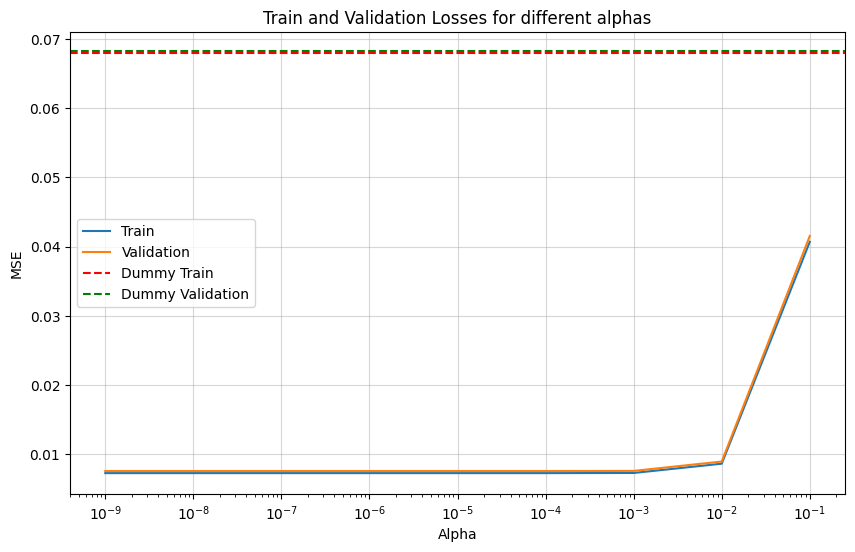

In [103]:
#step 3 - plot the results , dont forget to add constand line for the dummy regressor and the linear regressor
plt.figure(figsize=(10, 6))
plt.plot(alpha_list, train_scores, label='Train')
plt.plot(alpha_list, validation_scores, label='Validation')
plt.axhline(-dummy_cv_results['train_score'].mean(), color='r', linestyle='--', label='Dummy Train')
plt.axhline(-dummy_cv_results['test_score'].mean(), color='g', linestyle='--', label='Dummy Validation')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Train and Validation Losses for different alphas')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [107]:
best_alpha = 1e-3
main_lasso_regressor = Lasso(alpha=best_alpha,fit_intercept=True)
cv_results = cross_validate(main_lasso_regressor, Q4_X_train, Q4_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
print ('Mean train score: ', -cv_results['train_score'].mean())
print ('Mean validation score: ', -cv_results['test_score'].mean())


Mean train score:  0.007284920519968102
Mean validation score:  0.007579935915142033


retraining the lasso linear regressor

In [108]:
main_lasso_regressor.fit(Q4_X_train, Q4_y_train)

Lasso(alpha=0.001)

In [109]:
#Specify the 5 features having the 5 largest coefficients (in absolute value) in the
#resulting regressor, from the largest to the smallest (among these 5). 

# get the coefficients of the lasso regressor
coefficients = main_lasso_regressor.coef_
# get the names of the features
feature_names = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10','sugar_levels']
# create a dictionary to store the coefficients
coefficients_dict = {}
for i in range(len(coefficients)):
    coefficients_dict[feature_names[i]] = coefficients[i]
# sort the coefficients in descending order
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)
# get the 5 features with the largest coefficients
top_5_features = sorted_coefficients[:5]
top_5_features


[('sugar_levels', 0.36669742224463403),
 ('PCR_04', 0.18930088125862946),
 ('PCR_02', -0.07696702507984804),
 ('PCR_06', -0.046071044471914444),
 ('PCR_09', -0.00783495005630096)]

In [ ]:
#We now wish to visualize the resulting coefficients.
# (Q10) Sort and plot the absolute values of the learned
# coefficients. The x-axis should be the index of the
# parameter from largest to smallest. 